In [1]:
#!pip install pillow

In [2]:
import numpy as np
import pandas as pd

filename = f'../npz/BTCUSD_1T.npz'
data = np.load(filename, allow_pickle=True)['data']
# преобразование в формат pandas
loaded_df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

In [3]:
# Преобразование 'timestamp' в datetime и установка его как индекс DataFrame
loaded_df['timestamp'] = pd.to_datetime(loaded_df['timestamp'])
loaded_df.set_index('timestamp', inplace=True)

# Преобразование всех столбцов с ценами и объемом в числовой формат
for column in ['open', 'high', 'low', 'close', 'volume']:
    loaded_df[column] = pd.to_numeric(loaded_df[column], errors='coerce')

In [4]:
from PIL import Image

def generate_image_from_matrix(matrix):
    """
    Функция для создания и отображения изображения из двумерной матрицы целых чисел.
    Значение элемента матрицы определяет яркость пикселя.
    
    :param matrix: двумерный массив numpy с целыми числами от 0 до 255
    """
    # Проверим, что матрица содержит только значения от 0 до 255
    if not (np.issubdtype(matrix.dtype, np.integer) and matrix.min() >= 0 and matrix.max() <= 255):
        raise ValueError("Матрица должна содержать целые числа в диапазоне от 0 до 255.")
    
    # Создаем изображение
    image = Image.fromarray(matrix.astype('uint8'), mode='L')
    
    # Отображаем изображение в результатах Jupyter Notebook
    display(image)

In [41]:
# select last 10000 rows
df = loaded_df.tail(10000)
# df = loaded_df
df.shape

(10000, 5)

In [42]:
# calculate the moving average for close prices
ma1 = df['close'].rolling(window=30).mean()
ma2 = df['close'].rolling(window=90).mean()
ma3 = df['close'].rolling(window=270).mean()

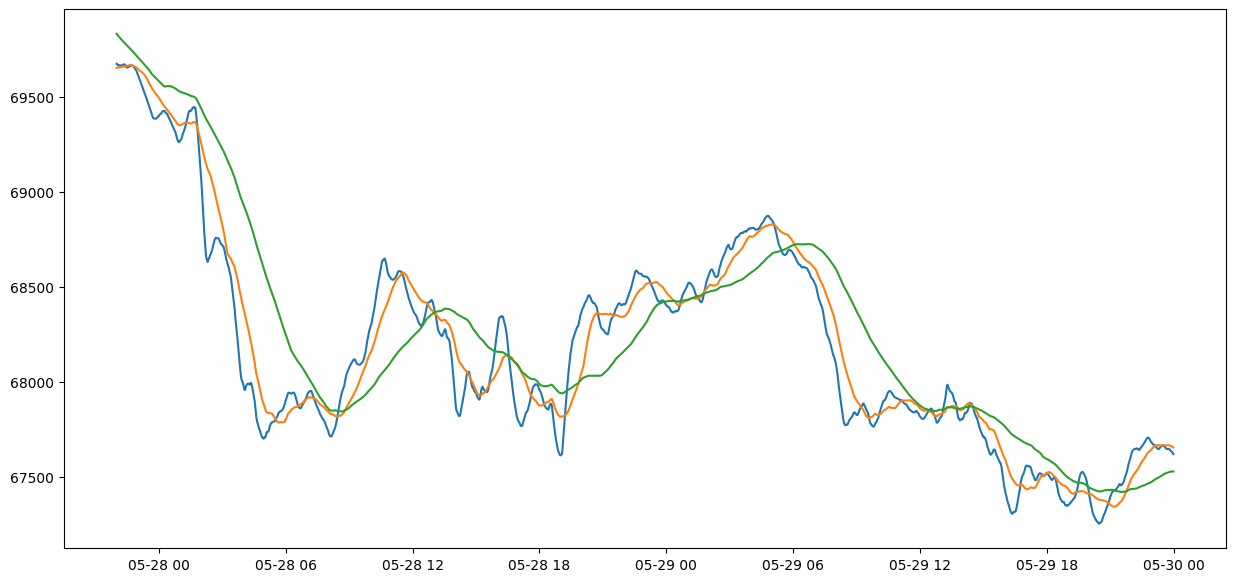

In [43]:
import matplotlib.pyplot as plt
n = -3000

plt.figure(figsize=(15, 7))
plt.plot(ma1[n:])
plt.plot(ma2[n:])
plt.plot(ma3[n:])
plt.show()

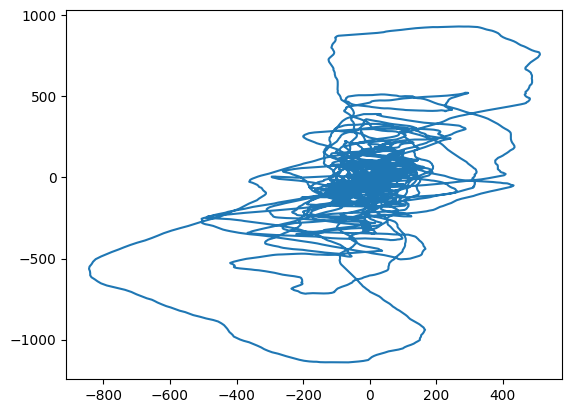

In [44]:
# calculate difference between 10MA and 20MA
x = (ma1 - ma2).fillna(0)
y = (ma2 - ma3).fillna(0)
plt.plot(x, y)

In [45]:
def get_density(matrix_size = 300):
    matrix = np.zeros((matrix_size, matrix_size), dtype=np.float32)
    # loop over x and increment the value of the matrix
    min_x = x.min()
    max_x = x.max()
    min_y = y.min()
    max_y = y.max()
    width = max_x - min_x
    height = max_y - min_y
    last_i, last_j = -1, -1
    for k in range(len(x)):
        i = int((x.iloc[k] - min_x) / width * (matrix_size - 1))
        j = int((y.iloc[k] - min_y) / height * (matrix_size - 1))
        if (i != last_i) or (j != last_j):
            matrix[j, i] += 1
            last_i, last_j = i, j
    return matrix

In [46]:
matrix = get_density()

In [47]:
matrix_log = np.log(matrix + 1)

In [48]:
def rescale_matrix(matrix, new_min=0, new_max=255):
    # Find the minimum and maximum values in the matrix
    old_min = np.min(matrix)
    old_max = np.max(matrix)
    
    # Rescale the matrix to the new range [new_min, new_max]
    rescaled_matrix = (matrix - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    
    # Convert to the desired dtype (e.g., uint8)
    rescaled_matrix = np.clip(rescaled_matrix, new_min, new_max).astype(np.uint8)
    
    return rescaled_matrix

In [49]:
resc = rescale_matrix(matrix_log)

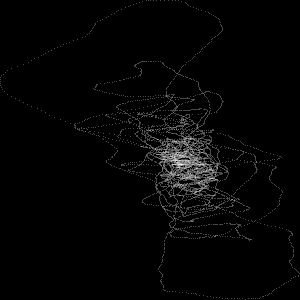

In [50]:
generate_image_from_matrix(resc)

In [51]:
#!pip install seaborn

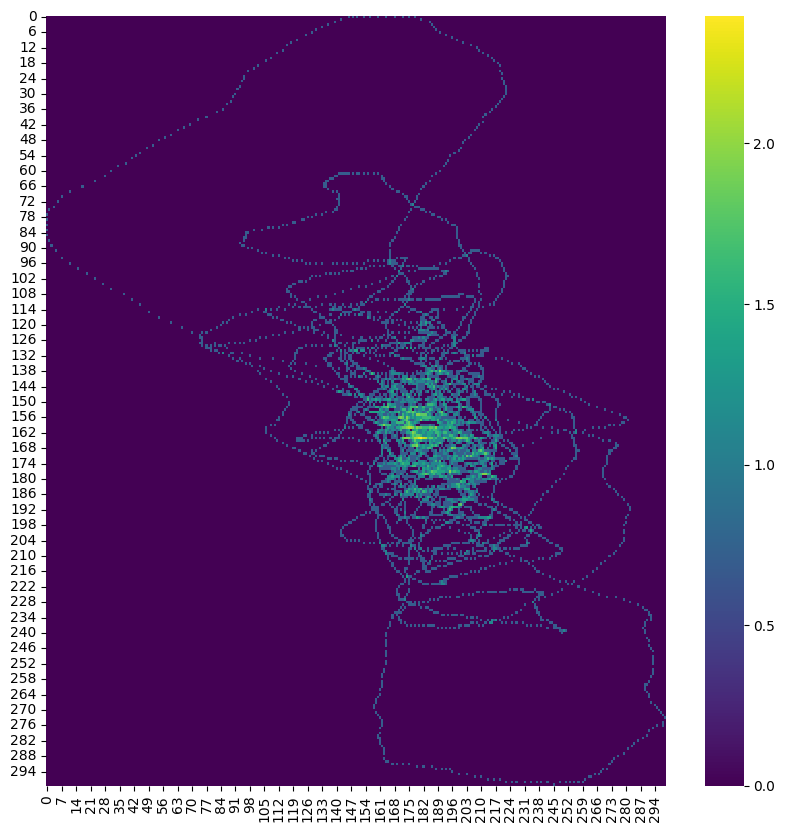

In [55]:
import seaborn as sns

plt.figure(figsize=(10, 10))
# sns.heatmap(matrix_log[130:260,130:260], cmap='viridis')
sns.heatmap(matrix_log, cmap='viridis')
plt.show()

In [53]:
row = matrix[198]
row[180:220]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 2., 0.,
       1., 1., 0., 1., 1., 1.], dtype=float32)

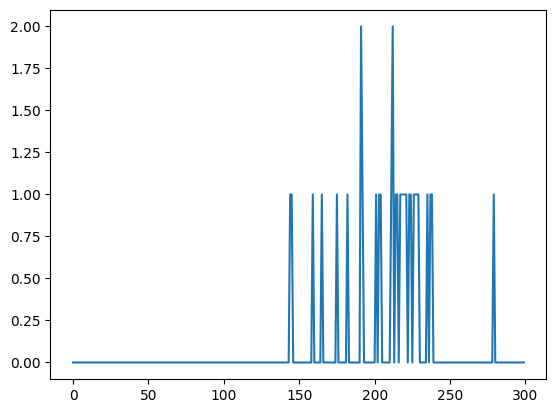

In [54]:
# plot row
plt.plot(row)